# Speech Based Sentiment Analysis

In [ ]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv('/content/drive/MyDrive/Sentiment Analysis/TRAIN.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Filename,Class
0,346.wav,Negative
1,163.wav,Neutral
2,288.wav,Negative
3,279.wav,Negative
4,244.wav,Negative


In [ ]:
df.tail()

,Filename,Class
245,204.wav,Neutral
246,46.wav,Positive
247,318.wav,Negative
248,49.wav,Positive
249,191.wav,Neutral


In [ ]:
# importing modules and libraries

import numpy as np
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import (InputLayer, Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout, ELU, UpSampling2D)
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Nadam
from keras.layers import Input, Multiply, UpSampling2D
from keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
import os
import tensorflow as tf
import numpy as np

dataset_dir = '/content/drive/MyDrive/Sentiment Analysis/train_images'  # Dataset directory path
images_list = []  # Stores images
labels_list = []  # Stores labels
image_size = (224, 224)  # Image resizing specification

for file_name in os.listdir(dataset_dir):
    file_path = os.path.join(dataset_dir, file_name)
    image_data = tf.io.read_file(file_path)  # Reading image file
    image = tf.image.decode_jpeg(image_data, channels=3)  # Converting to RGB format
    image = tf.image.resize(image, image_size)  # Resizing image
    image = tf.cast(image / 255.0, tf.float32)  # Normalizing image

    label = os.path.splitext(file_name)[0]  # Extracting label from filename
    labels_list.append(label)
    images_list.append(image.numpy())  # Appending image

images = np.array(images_list)  # Converting images to array format
labels = np.array(labels_list)  # Keeping labels as is

In [ ]:
for i in range(len(labels)):
    filename = labels[i] + '.wav' # to check path name in dataframe to get corresponding emotion
    emotion = df[df['Filename'] == filename]['Class'].values[0] # getting emotion for a file from its name
    labels[i] = emotion # setting emotion in place of file name

In [ ]:
labels

array(['Pos', 'Neg', 'Pos', 'Neu', 'Neg', 'Neg', 'Neu', 'Neu', 'Neg',
       'Pos', 'Neg', 'Pos', 'Pos', 'Neu', 'Pos', 'Neu', 'Pos', 'Neu',
       'Pos', 'Neu', 'Neu', 'Neu', 'Neu', 'Pos', 'Neg', 'Neu', 'Neu',
       'Pos', 'Neg', 'Pos', 'Pos', 'Neg', 'Neu', 'Neg', 'Neg', 'Neg',
       'Neg', 'Neu', 'Neu', 'Neu', 'Pos', 'Pos', 'Pos', 'Pos', 'Neg',
       'Neu', 'Pos', 'Pos', 'Pos', 'Neu', 'Pos', 'Neg', 'Pos', 'Neu',
       'Neg', 'Neg', 'Pos', 'Neu', 'Pos', 'Neg', 'Neg', 'Pos', 'Neu',
       'Neg', 'Neu', 'Neu', 'Neg', 'Neg', 'Pos', 'Neg', 'Pos', 'Neu',
       'Pos', 'Neg', 'Neu', 'Pos', 'Neu', 'Pos', 'Pos', 'Neu', 'Pos',
       'Pos', 'Pos', 'Pos', 'Neu', 'Pos', 'Neu', 'Pos', 'Neg', 'Pos',
       'Neu', 'Neu', 'Neu', 'Neu', 'Pos', 'Neu', 'Pos', 'Neu', 'Neg',
       'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Neu', 'Pos',
       'Neg', 'Neg', 'Pos', 'Pos', 'Neg', 'Pos', 'Neu', 'Neu', 'Pos',
       'Neg', 'Neg', 'Pos', 'Neu', 'Neg', 'Neg', 'Pos', 'Neu', 'Neu',
       'Neu', 'Pos',

Text(0.5, 1.0, 'Neg')

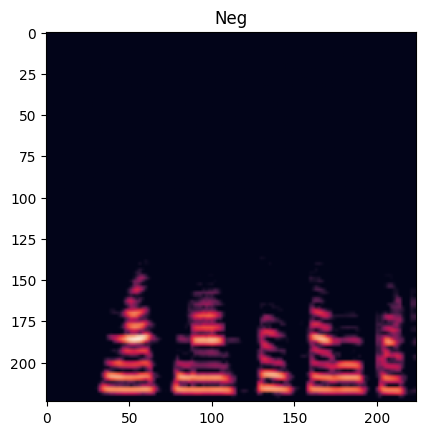

In [ ]:
plt.imshow(images[60]) # printing images with emotions
plt.title(labels[60])

Text(0.5, 1.0, 'Pos')

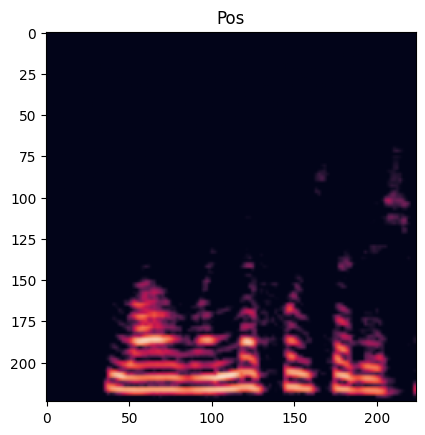

In [ ]:
plt.imshow(images[80])
plt.title(labels[80])

Text(0.5, 1.0, 'Neu')

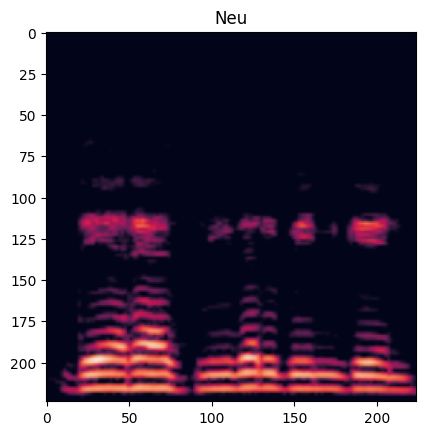

In [ ]:
plt.imshow(images[95])
plt.title(labels[95])

In [ ]:
from sklearn.preprocessing import LabelEncoder # label encoding emotions

encode = LabelEncoder()

labels = encode.fit_transform(labels) # fitting to encoder

In [ ]:
labels #labels turned  to numerical values

array([2, 0, 2, 1, 0, 0, 1, 1, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 0, 1, 1, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2,
       0, 1, 2, 2, 2, 1, 2, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1,
       0, 0, 2, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0,
       2, 2, 0, 2, 1, 1, 2, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2, 0, 0, 1, 2, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2,
       1, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0,
       2, 1, 0, 0, 1, 1, 0, 2, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 1, 0, 0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 2, 1, 2, 2,
       2, 1, 1, 0, 2, 2, 2, 1])

In [ ]:
labels = np.eye(len(np.unique(labels)))[labels] #turning labels into probability distributions

In [ ]:
# Splitting the data
x_train, x_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.4,random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5,random_state=42)

# 60:20:20 split

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)
print("x_val:", x_val.shape)
print("y_val:", y_val.shape)

x_train: (150, 224, 224, 3)
y_train: (150, 3)
x_test: (50, 224, 224, 3)
y_test: (50, 3)
x_val: (50, 224, 224, 3)
y_val: (50, 3)


# VGG - 16

In [ ]:
from keras.applications import VGG16
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau

In [ ]:
# Loading model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
feature_extractor = Model(inputs=vgg16_model.input, outputs=vgg16_model.get_layer('block4_pool').output)

# Freezing convolutional layers
for layer in feature_extractor.layers:
    layer.trainable = False

# Adding dense layers on top
x = feature_extractor.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
output = Dense(3, activation='softmax')(x)

# binding model
model = Model(inputs=feature_extractor.input, outputs=output)

model_checkpoint = ModelCheckpoint('model.keras', monitor='val_accuracy', save_best_only=True, verbose=1, mode='max')
reduce_lr = ReduceLROnPlateau(mode='min', monitor='val_loss', factor=0.1, patience=5, min_lr=0.00000001, verbose=1)

model.summary() # printing summary of model

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,163,651 (31.14 MB)

 Trainable params: 528,387 (2.02 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # compiling and fitting model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=25,callbacks=[reduce_lr,model_checkpoint])

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.2530 - loss: 1.7633 
Epoch 1: val_accuracy improved from -inf to 0.22000, saving model to model.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 119s 20s/step - accuracy: 0.2588 - loss: 1.7653 - val_accuracy: 0.2200 - val_loss: 1.7713 - learning_rate: 0.0010
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.4436 - loss: 1.2422 
Epoch 2: val_accuracy improved from 0.22000 to 0.28000, saving model to model.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 154s 23s/step - accuracy: 0.4440 - loss: 1.2231 - val_accuracy: 0.2800 - val_loss: 1.3768 - learning_rate: 0.0010
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.4874 - loss: 1.0196 
Epoch 3: val_accuracy improved from 0.28000 to 0.58000, saving model to model.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 137s 22s/step - accuracy: 0.4997 - loss: 1.0047 - val_accuracy: 0.5800 - val_loss: 0.9869 - learning_rate: 0.0010
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.6681 - loss: 0.8012 
Ep